# Step 1 : Import the necessary Libraries
### import iris dataset


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd

# Step 2 : Load the iris Dataset

In [2]:
iris = load_iris()
X = iris.data
Y = iris.target

# Step 3 : Elbow Method
Finding the ideal number of groups to divide the data into is a basic stage in any unsupervised algorithm. One of the most common techniques for figuring out this ideal value of k is the elbow approach.





In [3]:
inartia = []
k_range = range(1,11)

for k in k_range:
    Kmeans = KMeans(n_clusters=k, init='k-means++',max_iter=300, n_init=10, random_state=0)
    Kmeans.fit(X)
    inartia.append(Kmeans.inertia_)


c:\Users\zyadf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\zyadf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\zyadf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\zyadf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

# Step 4 : Plot the Elbow graph to find the optimum number of cluster



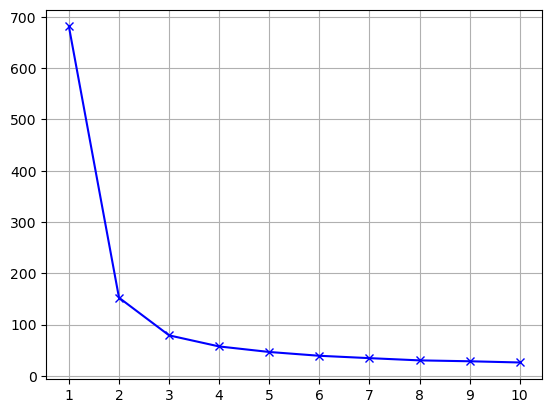

In [6]:
fig = plt.figure(0)
plt.grid(True)
plt.plot(k_range, inartia,'bx-')
plt.xticks(k_range)
plt.grid(True)
plt.show()

The plot displays a scatter plot of data points (X[:,0], X[:,1]) with grid lines. It also marks the initial cluster centers (red stars) generated for K-means clustering.



# Step 5 : Build the Kmeans clustering model



*   Find the cluster center
*   Predict the cluster group





In [7]:

k = 5

clusters = {}
np.random.seed(23)

for idx in range(k):
      center = X[np.random.randint(0,X.shape[0])]
      points = []
      cluster = {
      'center': center,
      'points': points
      }
      clusters[idx] = cluster

clusters

{0: {'center': array([6. , 2.7, 5.1, 1.6]), 'points': []},
 1: {'center': array([5. , 3.5, 1.3, 0.3]), 'points': []},
 2: {'center': array([5.4, 3.4, 1.5, 0.4]), 'points': []},
 3: {'center': array([6.1, 3. , 4.6, 1.4]), 'points': []},
 4: {'center': array([5.1, 3.4, 1.5, 0.2]), 'points': []}}

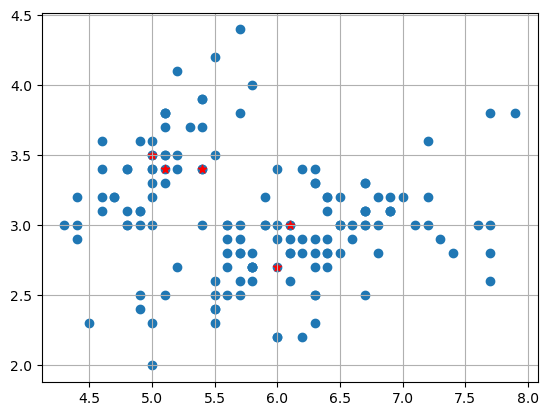

In [8]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()

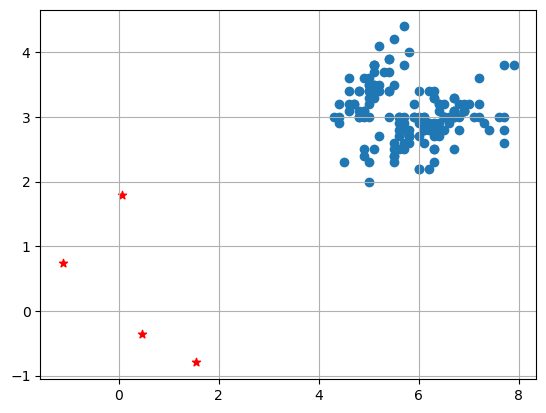

In [25]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()

In [9]:
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

In [10]:
def assign_cluster(X,clusters):
  for idx in range(X.shape[0]):
    dist = []
    curr_x = X[idx]

    for i in range(k):
      dis = distance(curr_x,clusters[i]['center'])
      dist.append(dis)
    curr_cluster = np.argmin(dist)
    clusters[curr_cluster]['points'].append(curr_x)
  return clusters


def update_cluster(X,clusters):
  for i in range(k):
    points = np.array(clusters[i]['points'])
    if points.shape[0] > 0:
        center = np.mean(points,axis = 0)
        clusters[i]['center'] = center
        clusters[i]['points'] = []
  return clusters


# Step 6 : Predict the cluster group

In [11]:
def pred_cluster(X,clusters):
  pred = []
  for i in range(X.shape[0]):
    dist = []
    for j in range(k):
      dist.append(distance(X[i],clusters[j]['center']))
    pred.append(np.argmin(dist))
  return pred

In [12]:
clusters = assign_cluster(X,clusters)
clusters = update_cluster(X,clusters)
pred = pred_cluster(X,clusters)


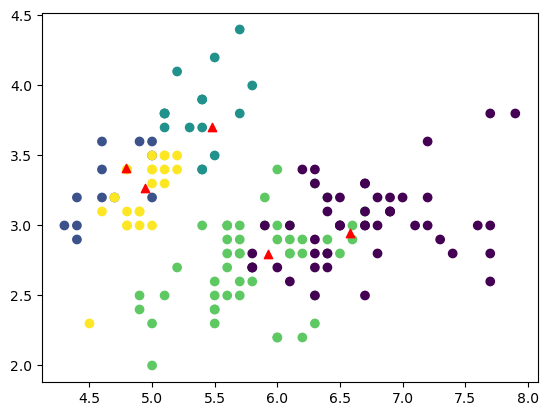

In [13]:
plt.scatter(X[:,0],X[:,1],c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()

# **Well done :)**
